<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/DIGIT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
digits = load_digits()

print("Image Data Shape ", digits.data.shape)

print("Image Data Shape ", digits.data.shape)

Image Data Shape  (1797, 64)
Image Data Shape  (1797, 64)


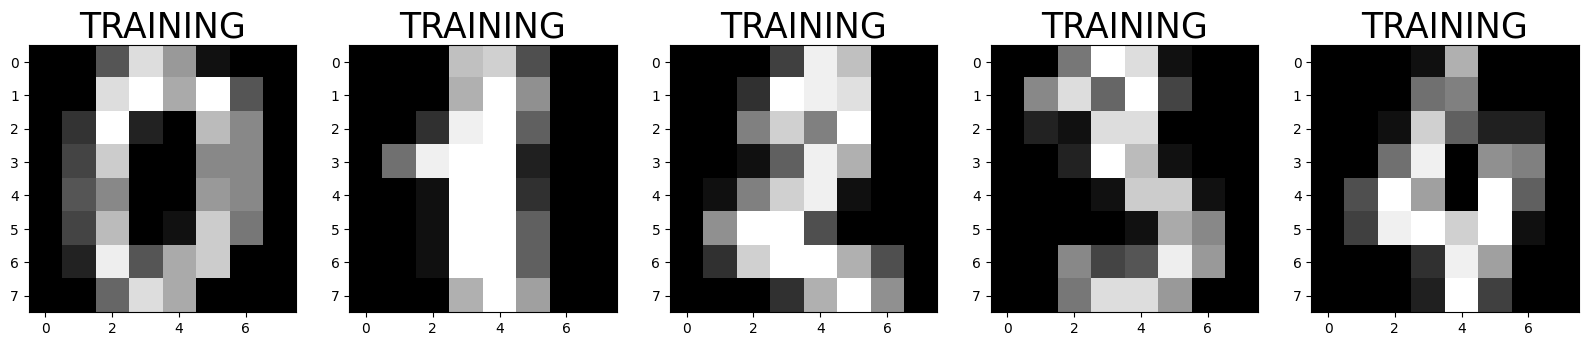

In [15]:
plt.figure(figsize=(20,4))
for index , (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5, index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('TRAINING',fontsize=25)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2429)


In [17]:
print(x_train.shape)

(1383, 64)


In [18]:
print(y_train.shape)

(1383,)


In [19]:
print(x_test.shape)

(414, 64)


In [20]:
print(y_test.shape)

(414,)


In [21]:
LogisticReg = LogisticRegression()
LogisticReg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print(LogisticReg.predict(x_test[0].reshape(1,-1)))
print(LogisticReg.predict(x_test[0:10]))


[2]
[2 8 8 7 5 4 6 5 4 5]


In [28]:
predictions = LogisticReg.predict(x_test)
score = LogisticReg.score(x_test, y_test)
print(score)

0.961352657004831


[[37  0  0  0  1  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  1]
 [ 0  0 46  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  1  0  0  1  1]
 [ 1  1  0  0 43  0  1  1  0  1]
 [ 0  0  0  0  0 40  0  0  0  1]
 [ 0  0  0  0  0  1 38  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  2  0  0  0  1  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0 43]]


Text(0.5, 1.0, 'Accuracy Score:0.961352657004831')

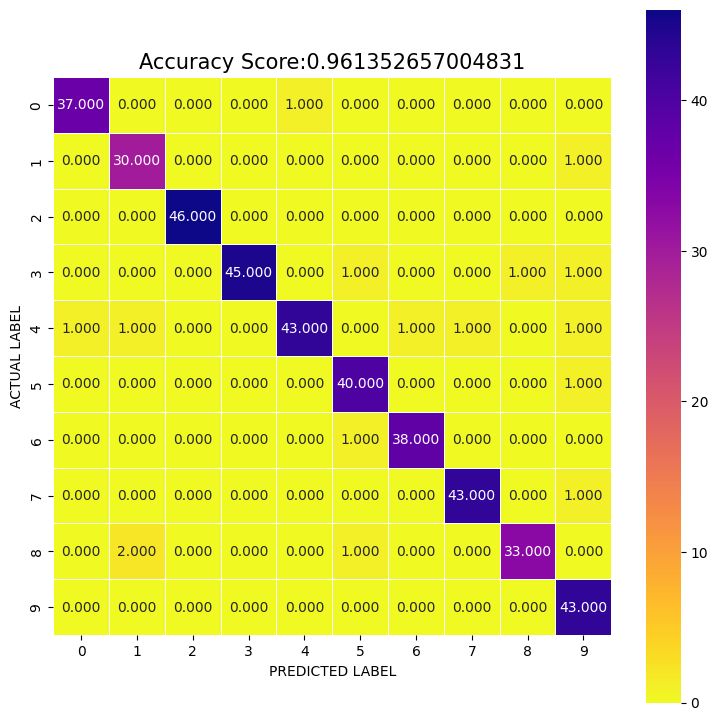

In [37]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True, cmap= 'plasma_r')
plt.ylabel('ACTUAL LABEL')
plt.xlabel('PREDICTED LABEL')
all_sample_title = 'Accuracy Score:{0}'.format(score)
plt.title(all_sample_title, size=15)

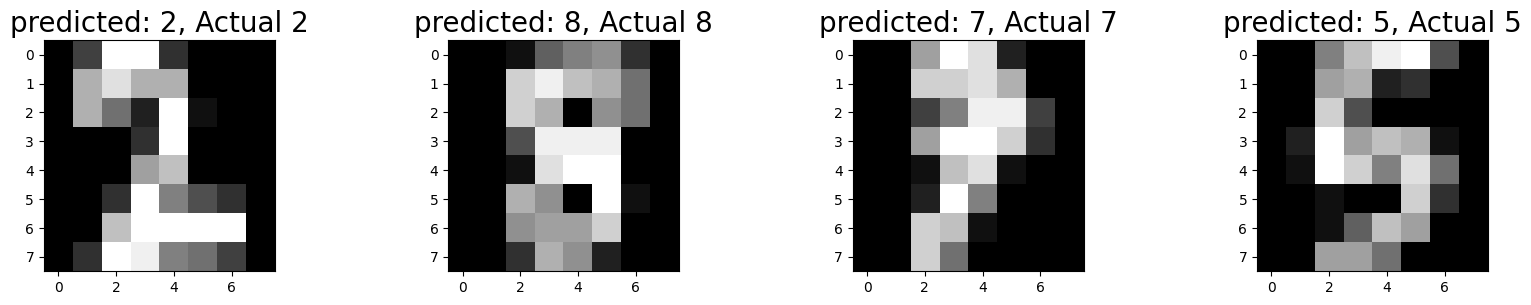

In [42]:
index=0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
  if predict == actual:
    misclassifiedIndex.append(index)
  index +=1
plt.figure(figsize=(20,3))
for plotIndex , wrong in enumerate (misclassifiedIndex[0:4]):
  plt.subplot(1,4, plotIndex+1)
  plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
  plt.title("predicted: {}, Actual {}".format(predictions[wrong], y_test[wrong]), fontsize=20)

